<a href="https://colab.research.google.com/github/bhavesh-choudhary1/machine_learning_concept/blob/main/Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/wine_data.csv', header=None, usecols=[0,1,2])
df.columns = ['Class label', 'Alcohol', 'Malic acid']

In [ ]:
df

,Class label,Alcohol,Malic acid
0,class_label,alcohol,malic_acid
1,1,14.23,1.71
2,1,13.2,1.78
3,1,13.16,2.36
4,1,14.37,1.95
...,...,...,...
174,3,13.71,5.65
175,3,13.4,3.91
176,3,13.27,4.28
177,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

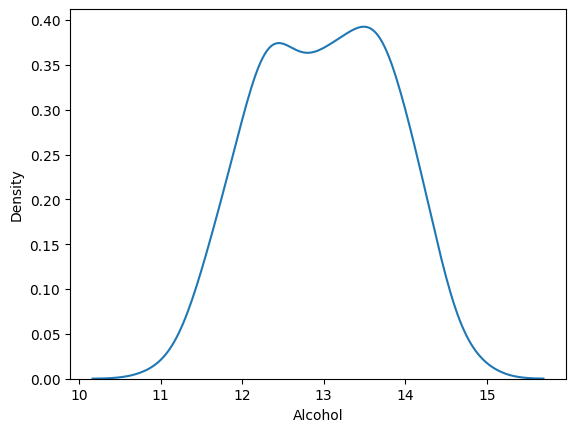

In [ ]:
# Convert 'Alcohol' column to numeric type, handling potential errors
df['Alcohol'] = pd.to_numeric(df['Alcohol'], errors='coerce')

# Now you should be able to plot
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

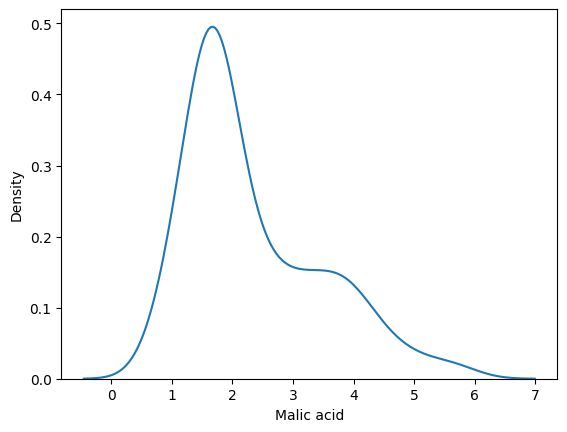

In [ ]:
df['Malic acid'] = pd.to_numeric(df['Malic acid'], errors='coerce')
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

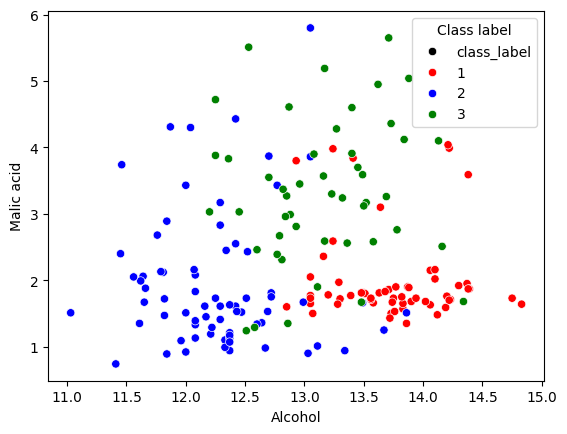

In [ ]:
color_dict = {'1':'red', '3':'Green','2':'Blue', 'class_label':'black'} # Added 'class_label' as a key to the color dictionary and ensured all keys are strings to match the values in the 'Class label' column.
sns.scatterplot(data=df, x='Alcohol', y='Malic acid', hue='Class label',palette=color_dict)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),df['Class label'],test_size=0.3, random_state=0)

In [ ]:
X_train.shape, X_test.shape

((125, 2), (54, 2))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.3
std,0.9,1.1
min,11.0,0.7
25%,12.3,1.5
50%,13.0,1.8
75%,13.7,3.0
max,14.8,5.6


In [ ]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


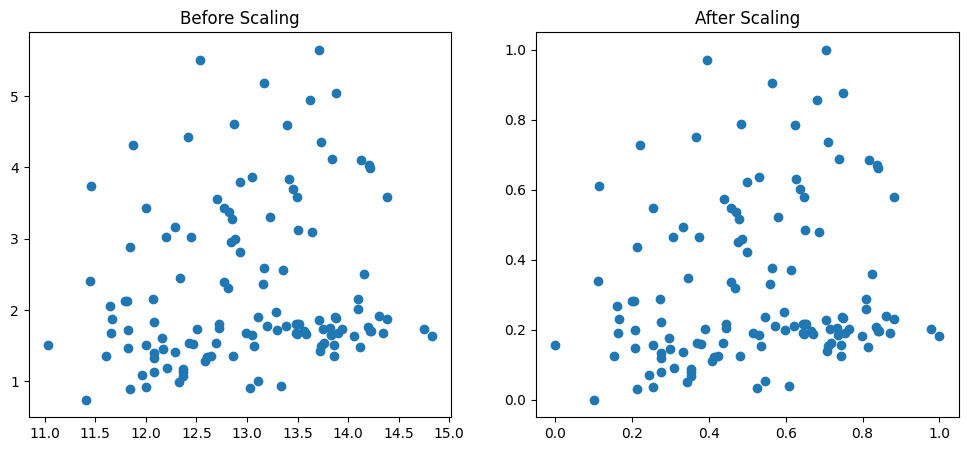

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'])
ax2.set_title('After Scaling')
plt.show()

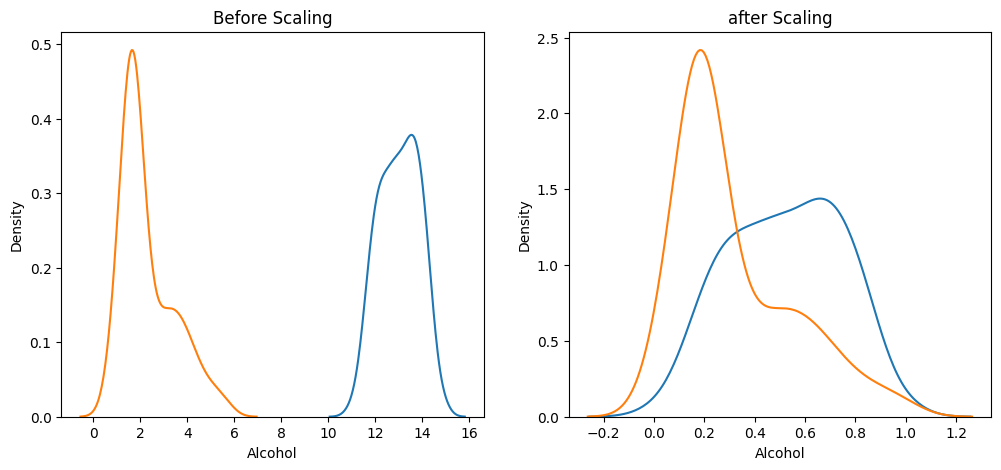

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

#before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)


#before scaling
ax2.set_title('after Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

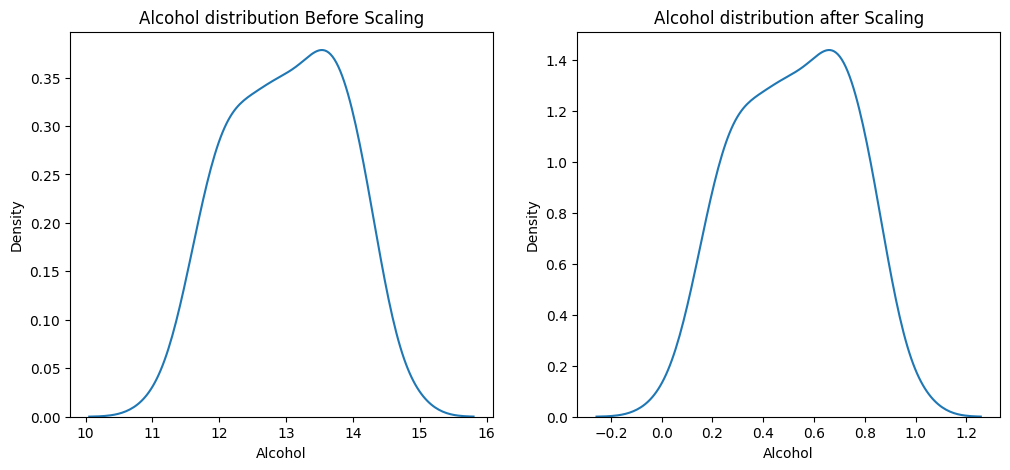

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

#before scaling
ax1.set_title('Alcohol distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)


ax2.set_title('Alcohol distribution after Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)

plt.show()

In [ ]:
# prompt: apply the logistic regression algorithm and find the accuracy

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7222222222222222


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
